# Hierarchical Clustering

In [1]:
# import hierarchical clustering libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Clustering/EastWestAirlines.csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
# rename some columns
data = data.rename(columns = {'ID#':'ID','Award?':'Award'}) 
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# check if data has any null values
# Data doesn't have any null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])

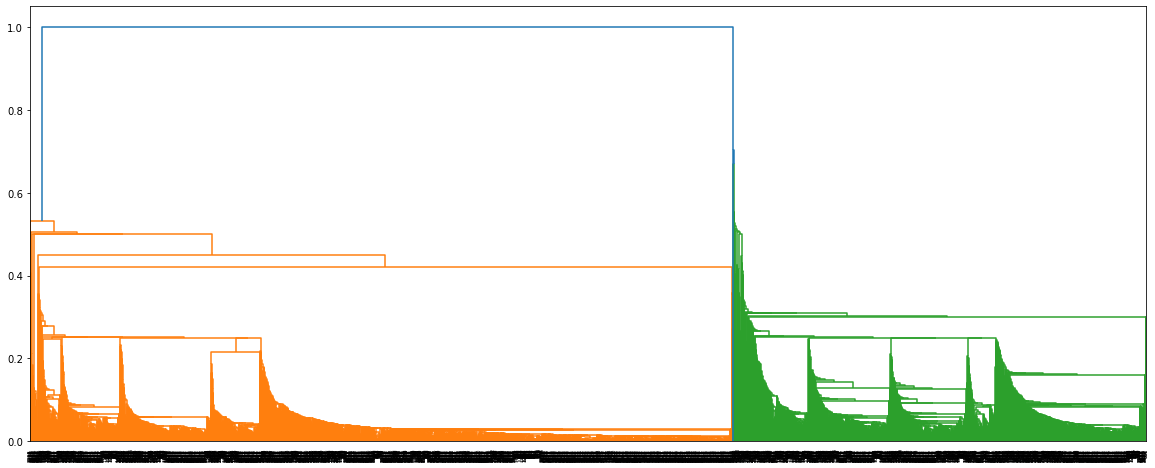

In [7]:
# create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

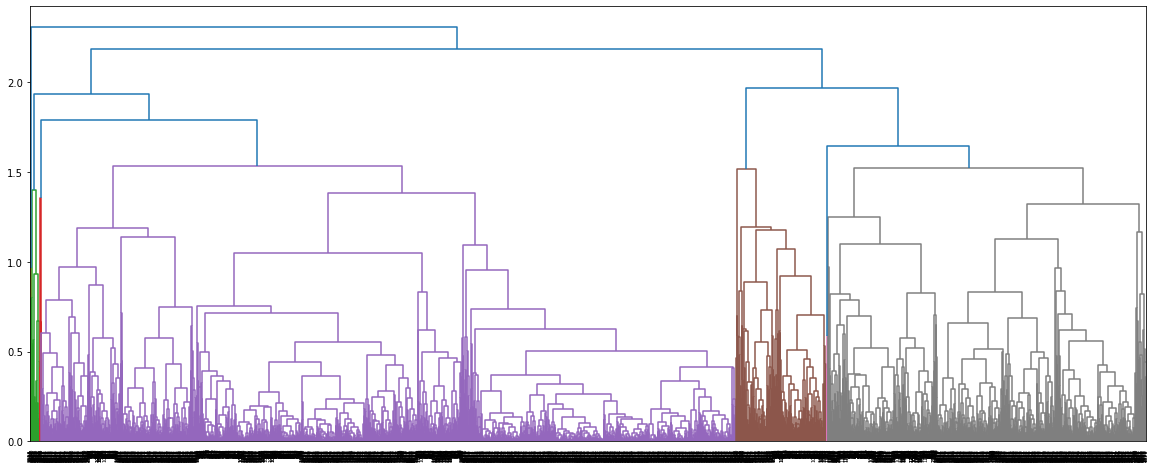

In [8]:
# create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

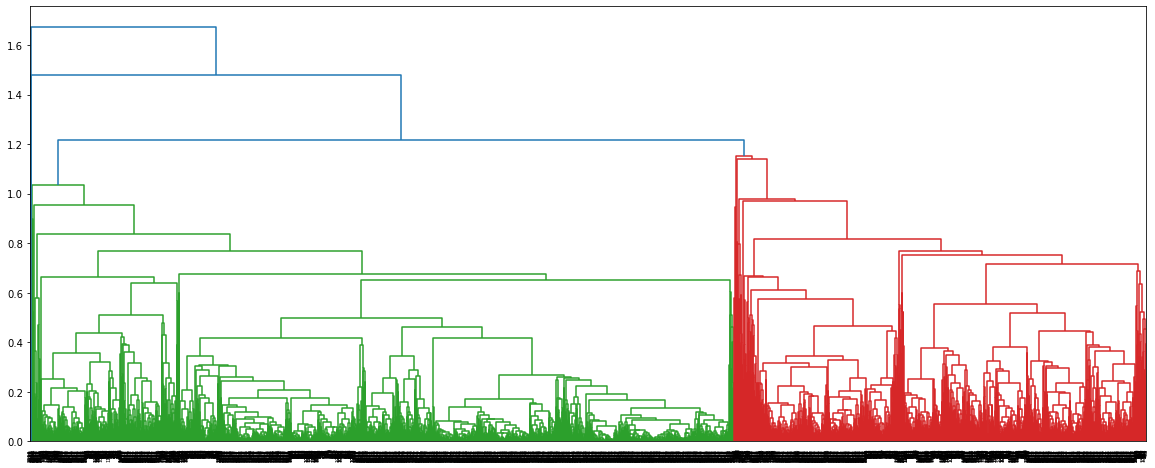

In [9]:
# create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

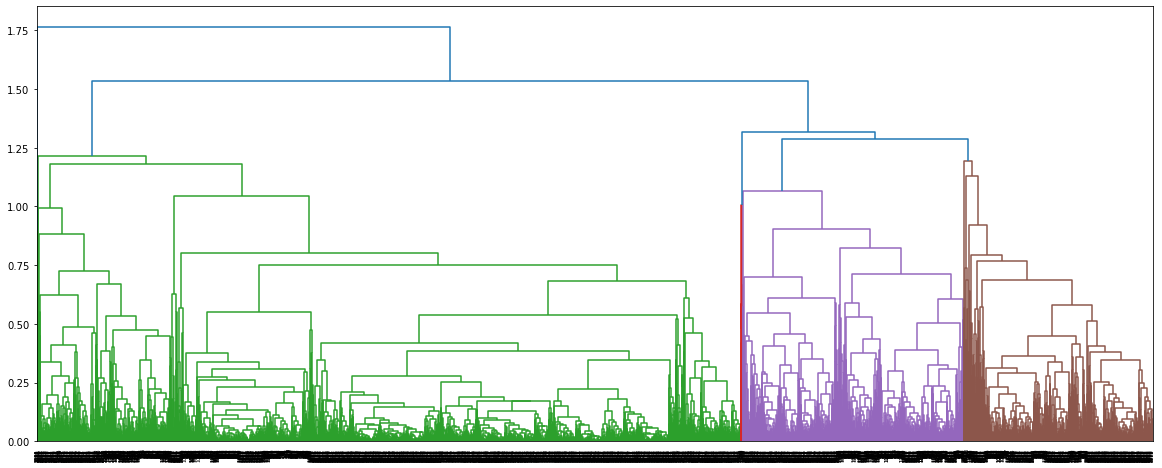

In [10]:
# create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='weighted'))

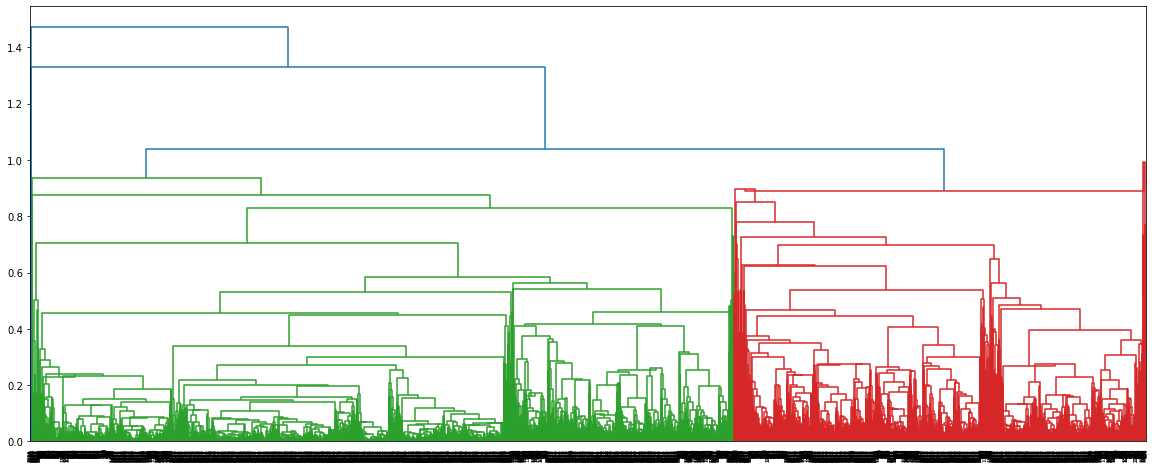

In [11]:
# create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

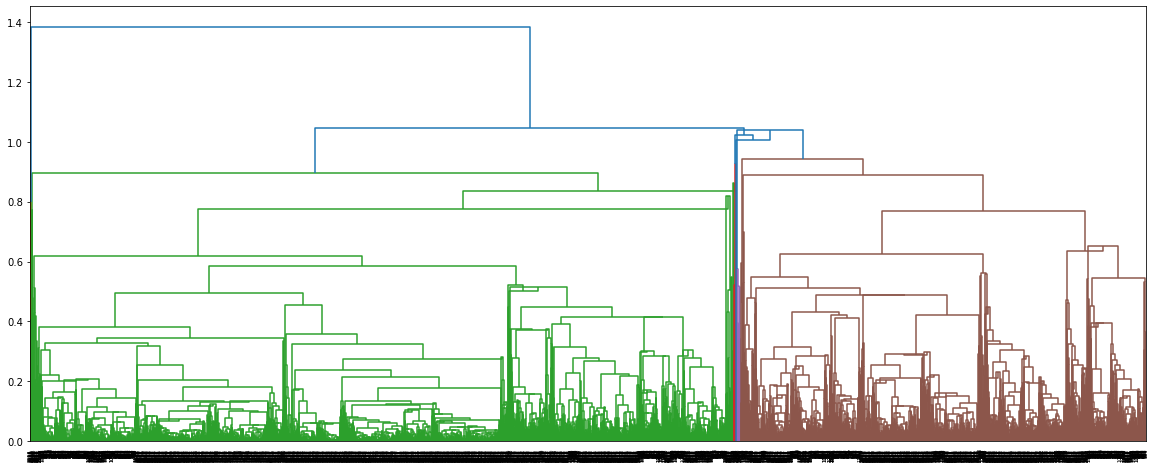

In [12]:
# create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='median'))

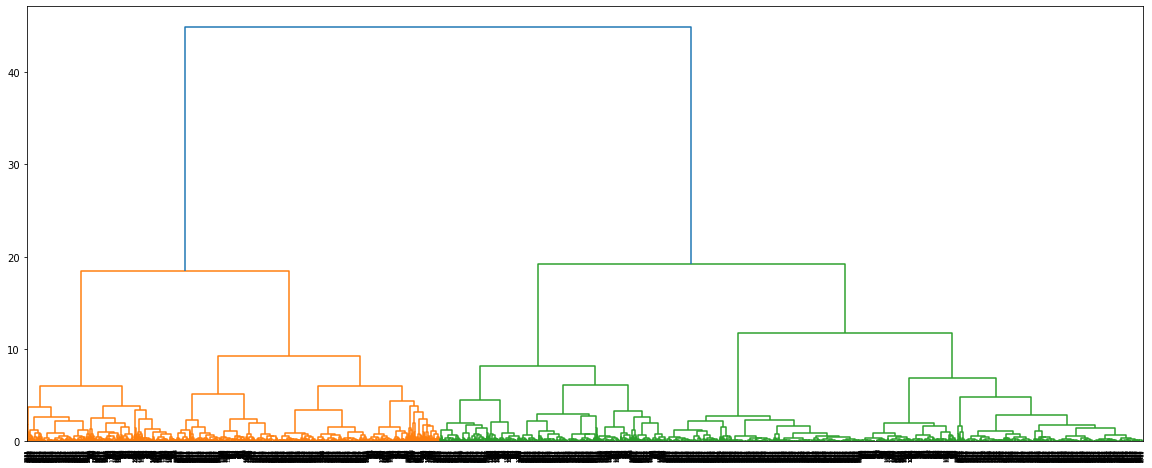

In [13]:
# create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

## After using linkage type as 'Complete','Weighted', and 'Ward', we can try forming 4-7 clusters and check the results

In [14]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [15]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [16]:
Clusters.value_counts()

Clusters
1           1011
0            946
2            808
4            699
3            535
dtype: int64

In [17]:
df_norm['h_clusterid'] = Clusters

In [18]:
df_norm.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
2829,0.002326,0.000000,0.25,0.0,0.0,0.031204,0.139535,0.000000,0.000000,0.241259,1.0,0
676,0.015577,0.313061,0.00,0.0,0.0,0.010789,0.162791,0.023364,0.075472,0.764046,1.0,0
677,0.005632,0.000000,0.50,0.0,0.0,0.077619,0.186047,0.000000,0.000000,0.763926,1.0,0
1265,0.004229,0.000000,0.00,0.0,0.0,0.009109,0.151163,0.000000,0.000000,0.656740,1.0,0
2194,0.047659,0.000000,0.00,0.0,0.0,0.073952,0.069767,0.000000,0.000000,0.476971,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3380,0.007372,0.000000,0.00,0.0,0.0,0.001327,0.034884,0.000000,0.000000,0.200386,0.0,4
3381,0.007736,0.000000,0.00,0.0,0.0,0.005689,0.034884,0.048674,0.056604,0.235471,0.0,4
1014,0.056795,0.098134,0.00,0.0,0.0,0.045888,0.220930,0.262842,0.320755,0.699180,0.0,4
3368,0.015291,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,4


# K-Means

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [20]:
data = pd.read_csv("C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Clustering/EastWestAirlines.csv")
data = data.rename(columns = {'ID#':'ID','Award?':'Award'}) 


In [21]:
# Normalization function 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data.iloc[:,1:])

## How to find optimum number of cluster
## The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

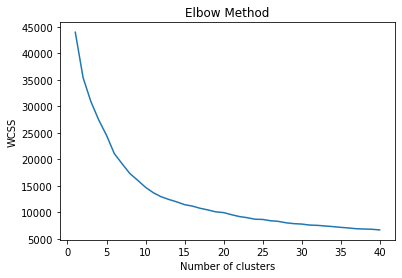

In [22]:
import warnings 
warnings.filterwarnings(action= 'ignore')

wcss = []
for i in range(1, 41):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 41), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Elbow Method shows optimum number of clusters in between 20 - 25

In [23]:
#Build Cluster algorithm
clusters_new = KMeans(23, random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=23, random_state=42)

In [24]:
clusters_new.labels_

array([20, 20, 20, ...,  3, 17, 17])

In [25]:
#Assign clusters to the data set
data['clusterid_new'] = clusters_new.labels_

In [26]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-3.95084676e-02, -3.08243311e-02, -7.23460959e-01,
        -9.82418871e-02, -6.27665798e-02, -4.83902112e-01,
        -1.75084237e-01,  2.11893352e+00,  1.63833450e+00,
        -5.94341617e-01, -6.68307991e-01],
       [-3.89426720e-01, -1.67103636e-01, -7.48706285e-01,
        -9.82418871e-02, -6.27665798e-02, -6.20676769e-01,
        -8.11200325e-01, -2.59382174e-01, -2.67208228e-01,
         2.20454221e-02, -7.66919299e-01],
       [ 4.43875214e-01, -7.00090524e-02,  2.06143552e+00,
        -9.82418871e-02, -3.19080167e-02,  2.49210093e+00,
         1.00254157e+00, -8.73397700e-02, -5.72064756e-02,
         6.42595567e-01,  1.27896831e+00],
       [-1.90170421e-01, -1.47349299e-01,  9.53207910e-01,
        -9.82418871e-02, -6.27665798e-02,  4.58258339e-01,
         6.24557055e-01, -2.02770840e-01, -2.14629951e-01,
        -5.44062710e-01,  1.30391816e+00],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
  

In [27]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2726.142857,69620.333333,120.269841,1.063492,1.0,1.000000,5459.603175,9.920635,3426.634921,7.587302,2891.317460,0.047619
1,1,1993.879310,34361.498084,14.848659,1.028736,1.0,1.000000,2156.775862,3.812261,96.911877,0.360153,4164.080460,0.000000
2,2,1276.831325,118327.554217,89.957831,4.897590,1.0,1.006024,77323.969880,21.228916,337.777108,1.156627,5445.439759,0.987952
3,3,2676.418773,54439.173285,30.129964,3.371841,1.0,1.000000,28210.844765,17.599278,176.169675,0.559567,2995.137184,1.000000
4,4,1664.866667,138061.400000,78.800000,3.466667,1.0,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,5,1730.333333,118980.333333,7192.740741,1.851852,1.0,1.000000,15077.888889,11.740741,1184.851852,3.481481,4630.888889,0.592593
6,6,2212.000000,52231.400000,66.666667,1.000000,3.0,1.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000
7,7,933.672414,457332.672414,13.500000,3.396552,1.0,1.000000,43072.931034,16.465517,530.327586,1.862069,6042.189655,0.655172
8,8,1222.688889,200102.755556,311.022222,4.577778,1.0,1.000000,89384.400000,34.844444,3729.400000,10.400000,5653.511111,0.888889


In [28]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,20
1,2,19244,0,1,1,1,215,2,0,0,6968,0,20
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,20
3,4,14776,0,1,1,1,500,1,0,0,6952,0,20
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,9
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,9
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,17


# DBScan

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [30]:
data = pd.read_csv("C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Clustering/EastWestAirlines.csv")
data = data.rename(columns = {'ID#':'ID','Award?':'Award'}) 

In [31]:
data = data.iloc[:,1:]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


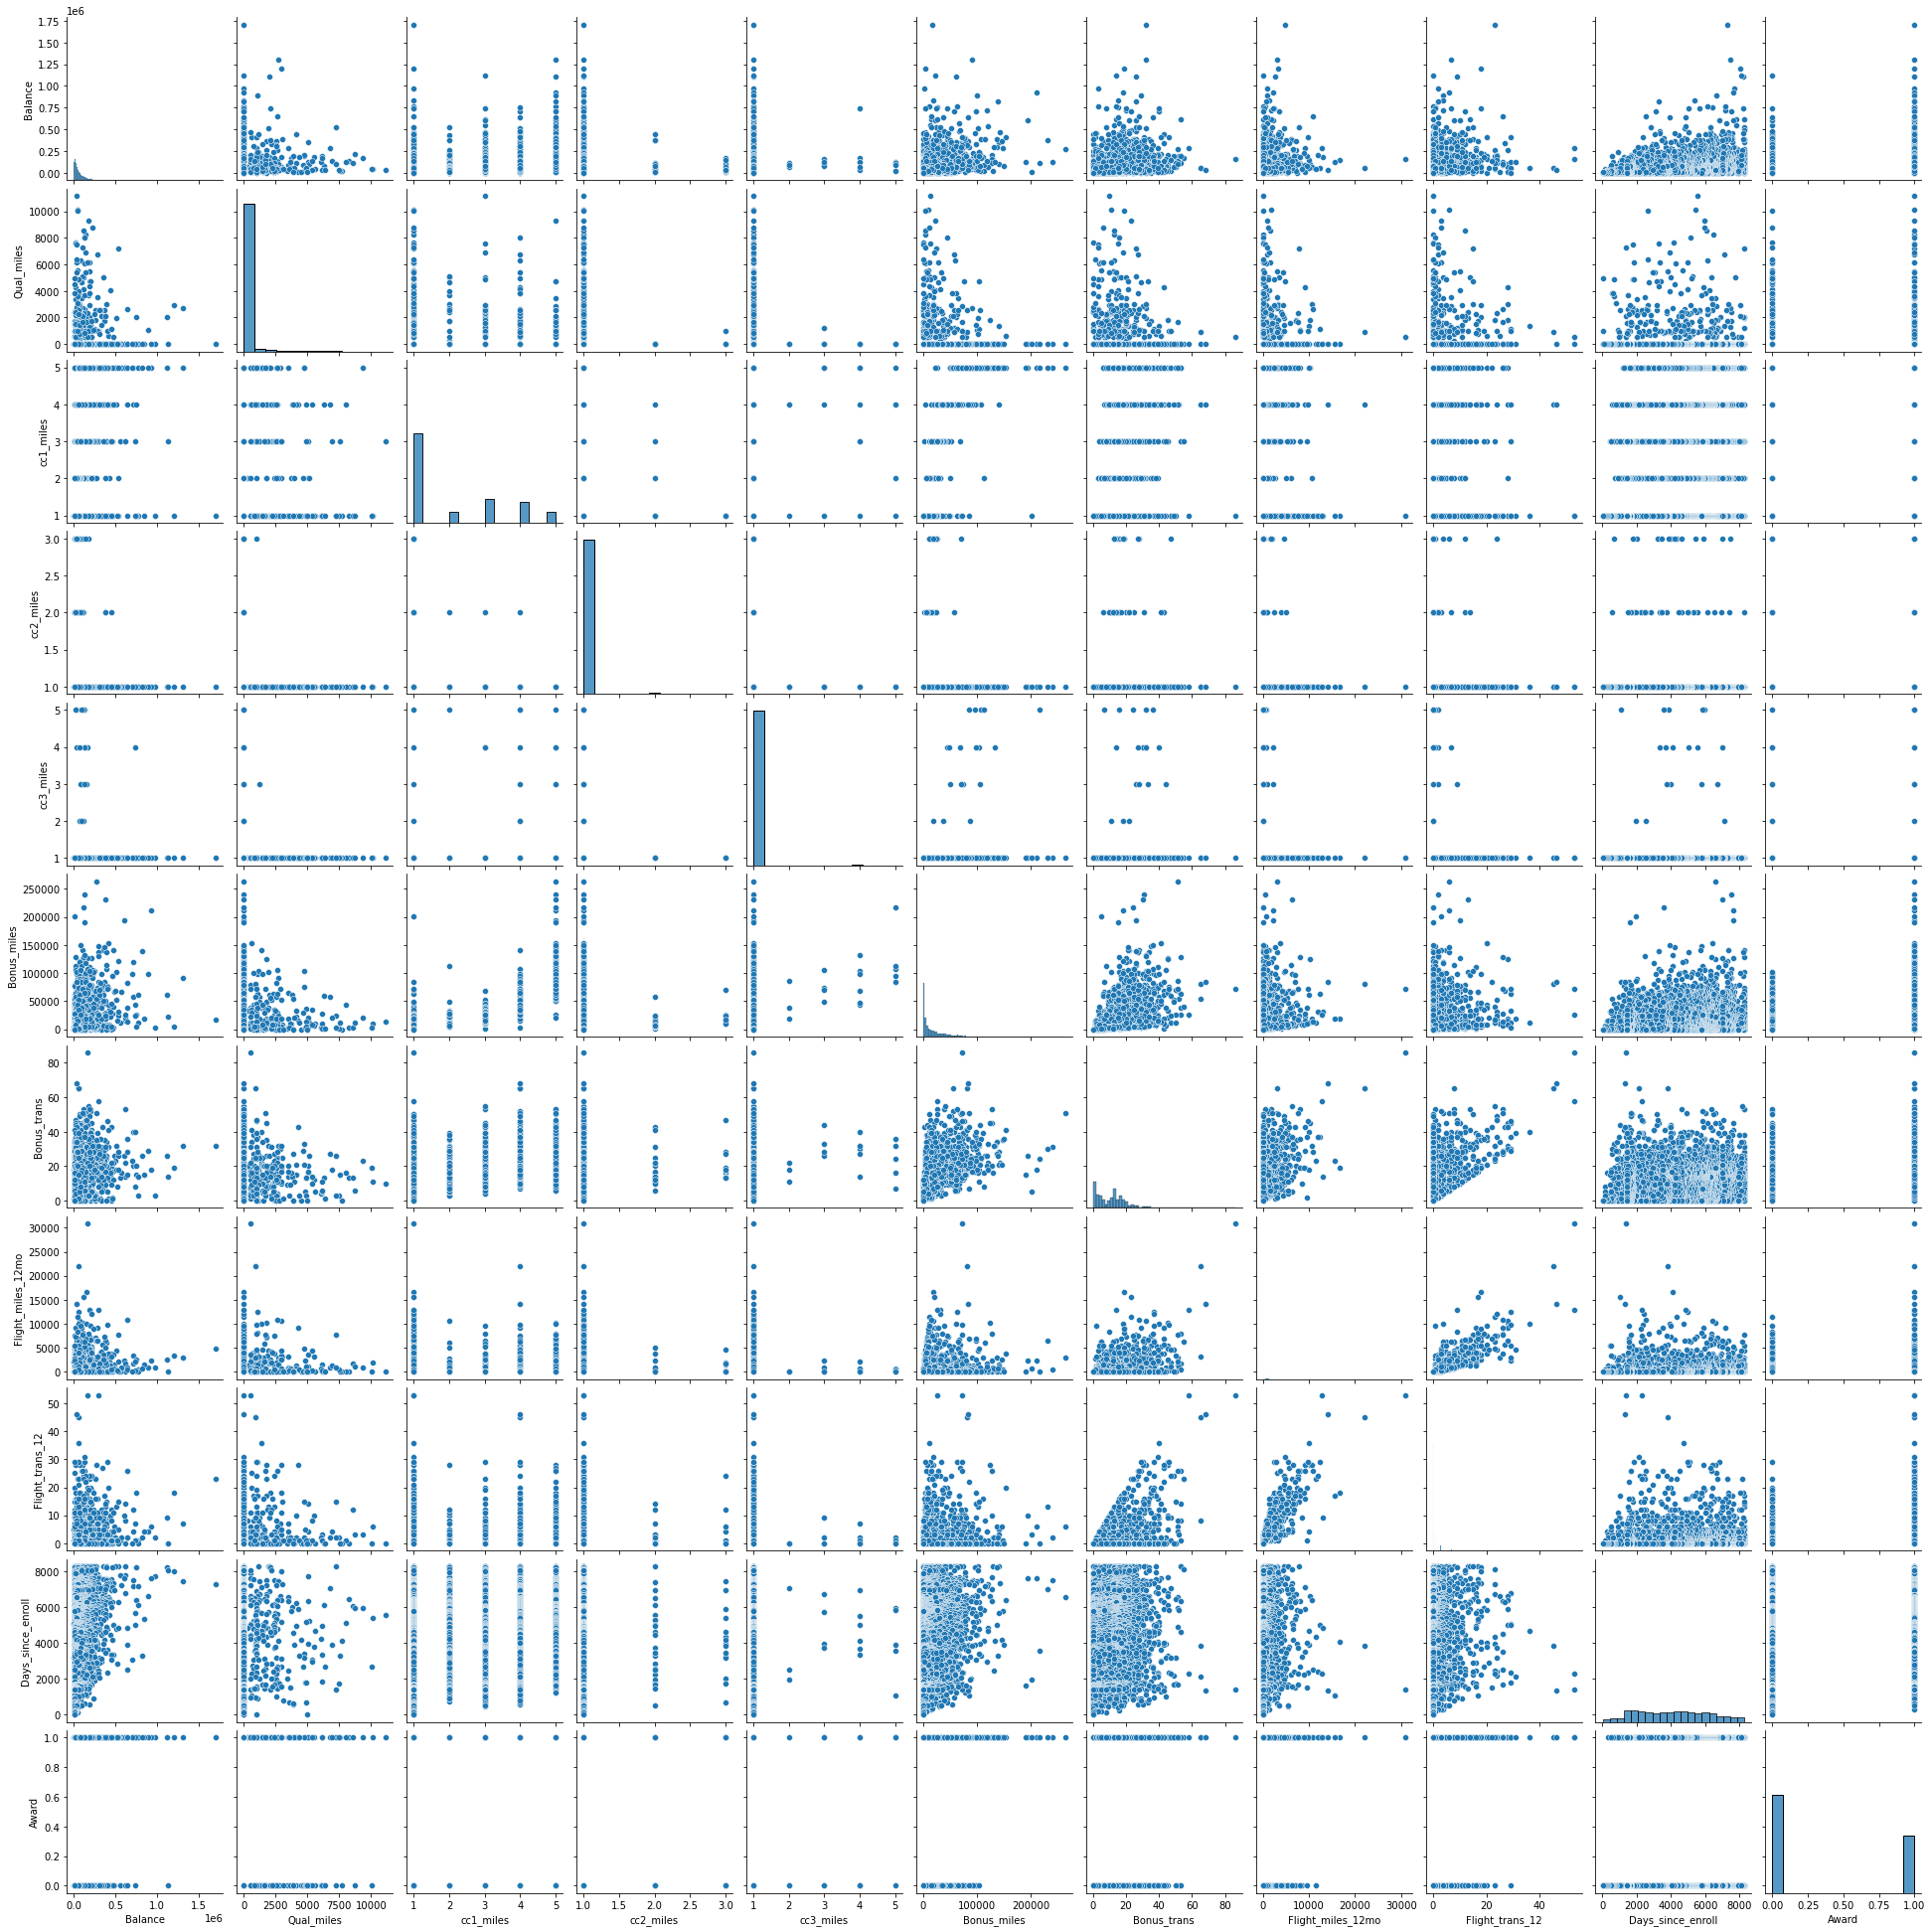

In [32]:
sns.pairplot(data)

<AxesSubplot:>

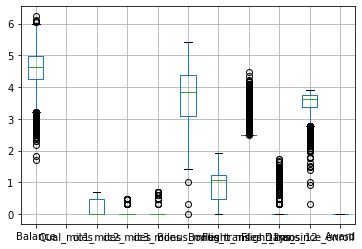

In [33]:
# To have a better look ata the boxplots
data.apply(np.log10).boxplot()

In [34]:
stscaler = StandardScaler().fit(data)
X = stscaler.transform(data)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

### MinPts can range from 3 to higher number. But Standard Practice is to use MinPts >= D+1

### Eps has to be adjusted in such a way that that its not either very small or very large at the same time (we can use k distance graph) . We also need to keep in mind that there can't be more trhan 20-50% of data points in any single cluster(Unless unavoidable). And noise has to be less tahn 30% of the data.

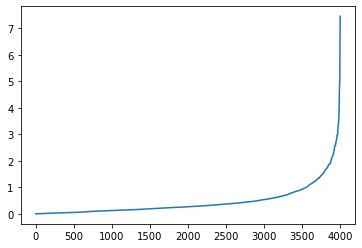

In [35]:
# for K distance graph
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### It can be observed by K-Distance graph that the graph moves sharply up when distance is more than 1.25, hence we can use 1.25 as eps.

In [36]:

dbscan = DBSCAN(eps=0.7, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=0.7, min_samples=10)

In [37]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [38]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [39]:
cl.value_counts()

cluster
 0         1515
-1         1110
 1          316
 5          268
 4          196
 3          182
 6          148
 2          144
 7           64
 8           43
 9           13
dtype: int64

In [40]:
data = pd.concat([data,cl],axis=1)

### With DBScan it becomes much clear that a lot of data entries are actually noise, but in Hierarchical(Agglomerative) and K-Means they were forcefully assigned to some cluster because both algorithms provide user with the choice of selecting the number of clusters whereas DBScan does not do that directly and asks for Eps and MinPts